In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

1.Image Input and Output

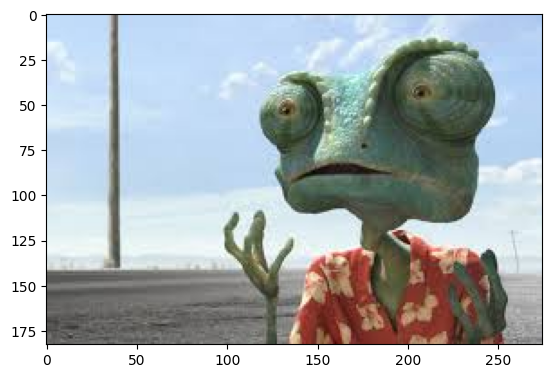

In [47]:
img=cv2.imread('image.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [48]:
img.shape

(183, 275, 3)

In [49]:
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gray.shape

(183, 275)

3. Boundary Extraction

In [50]:
height, width = img_gray.shape[:2]
top_row = img_gray[0, :]                  # Top row
bottom_row = img_gray[height - 1, :]      # Bottom row
left_col = img_gray[1:height - 1, 0]      # Left column (excluding corners)
right_col = img_gray[1:height - 1, width - 1]  # Right column (excluding corners)

print(top_row)
print(bottom_row)
print(left_col)
print(right_col)


[216 216 216 216 216 216 216 216 215 215 215 215 215 215 215 215 214 214
 214 214 214 214 214 214 214 214 214 214 214 214 214 214 215 214 210 199
 160 126  92 115 210 210 211 211 211 212 212 212 212 212 212 212 212 212
 212 212 212 212 212 212 212 212 212 212 212 212 212 212 212 212 212 212
 212 212 212 212 212 212 212 212 212 213 213 213 214 214 214 215 216 216
 216 217 217 218 218 218 218 218 218 218 218 218 218 218 216 216 215 215
 214 214 214 214 214 214 214 214 214 214 214 214 213 214 214 214 215 215
 215 216 215 215 215 215 215 215 215 215 213 211 208 208 212 220 228 234
 225 224 222 219 216 213 211 210 217 217 217 219 223 228 232 235 228 226
 223 219 215 211 208 206 215 211 210 214 222 228 229 227 230 231 232 232
 231 228 224 222 226 227 229 229 227 222 217 213 213 213 212 211 211 210
 209 209 206 206 206 205 204 203 203 202 194 198 202 202 201 205 216 226
 229 230 231 231 229 225 221 219 216 216 217 218 219 220 220 221 218 218
 217 216 214 213 212 212 207 206 206 205 204 204 20

3.Binary Image

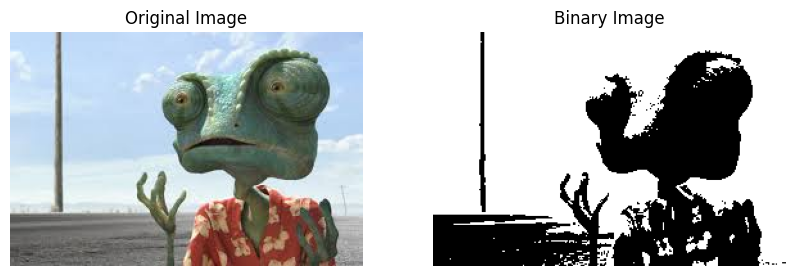

In [51]:
img=cv2.imread('image.jpeg')
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_, binary_img = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
# Step 4: Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Original Image
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_img, cmap='gray')  # Binary Image
plt.title("Binary Image")
plt.axis('off')

plt.show()

4.Boundary Sum

In [52]:
height, width = img_gray.shape[:2]
top_row = img_gray[0, :]                  # Top row
bottom_row = img_gray[height - 1, :]      # Bottom row
left_col = img_gray[1:height - 1, 0]      # Left column (excluding corners)
right_col = img_gray[1:height - 1, width - 1]  # Right column (excluding corners)

boundary_sum = top_row.sum() + bottom_row.sum() + left_col.sum() + right_col.sum()
print(boundary_sum)

161680


5.Diagonal sum

In [53]:

primary_diag_sum= np.trace(img_gray)

secondary_diag_sum = np.trace(np.fliplr(img_gray))

# Total diagonal sum (excluding double-counted center for odd-sized matrices)
if img_gray.shape[0] == img_gray.shape[1] and img_gray.shape[0] % 2 == 1:
    center_value = img_gray[img_gray.shape[0] // 2, img_gray.shape[1] // 2]
    total_diag_sum = primary_diag_sum + secondary_diag_sum - center_value
else:
    total_diag_sum = primary_diag_sum + secondary_diag_sum

print("Primary Diagonal Sum:", primary_diag_sum)
print("Secondary Diagonal Sum:", secondary_diag_sum)
print("Diagonal Sum:", total_diag_sum)


Primary Diagonal Sum: 33806
Secondary Diagonal Sum: 25011
Diagonal Sum: 58817


7.Image Negative

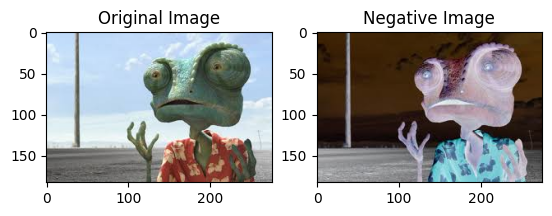

In [ ]:
img = cv2.imread('image.jpeg', cv2.IMREAD_GRAYSCALE)
negative_img = 255 - img

# Display original and negative images
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Negative Image')
plt.imshow(cv2.cvtColor(negative_img,cv2.COLOR_BGR2RGB))

plt.show()

8.Log transform

C:\Users\Faruk\AppData\Local\Temp\ipykernel_3372\10633844.py:2: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(img))
C:\Users\Faruk\AppData\Local\Temp\ipykernel_3372\10633844.py:2: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(img))
C:\Users\Faruk\AppData\Local\Temp\ipykernel_3372\10633844.py:3: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * (np.log(1 + img))
C:\Users\Faruk\AppData\Local\Temp\ipykernel_3372\10633844.py:3: RuntimeWarning: invalid value encountered in multiply
  log_transformed = c * (np.log(1 + img))
C:\Users\Faruk\AppData\Local\Temp\ipykernel_3372\10633844.py:6: RuntimeWarning: invalid value encountered in cast
  log_transformed_img = np.array(log_transformed, dtype=np.uint8)


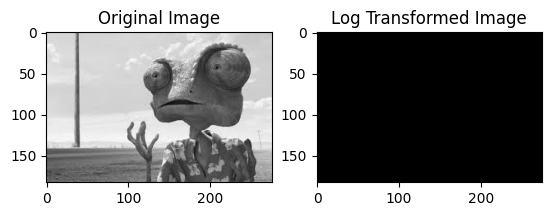

In [55]:
img = cv2.imread('image.jpeg', cv2.IMREAD_GRAYSCALE)
c = 255 / np.log(1 + np.max(img))
log_transformed = c * (np.log(1 + img))

# Convert back to 8-bit (0-255) range
log_transformed_img = np.array(log_transformed, dtype=np.uint8)

# Display original and log-transformed images
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Log Transformed Image')
plt.imshow(cv2.cvtColor(log_transformed_img, cv2.COLOR_BGR2RGB))

plt.show()


9. Power Transform

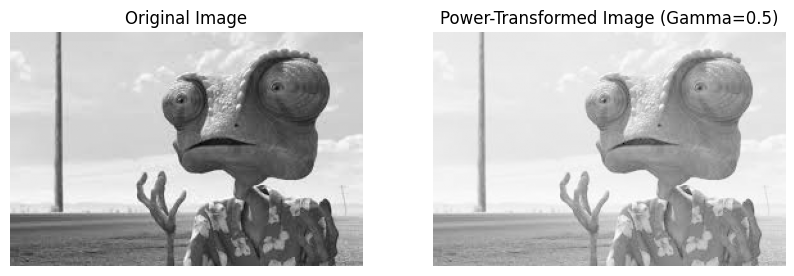

In [56]:
img = cv2.imread('image.jpeg', cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Step 2: Normalize the pixel values to the range [0, 1]
normalized_img = img / 255.0

# Step 3: Apply power-law (gamma) transformation
gamma = 0.5 # Choose a gamma value (try different values)
c = 1  # Scaling constant (often set to 1, but can be adjusted)
power_transformed_img = c * np.power(normalized_img, gamma)

# Step 4: Convert back to 8-bit format (0 to 255)
power_transformed_img = np.uint8(power_transformed_img * 255)

# Step 5: Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')  # Original Image in grayscale
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(power_transformed_img, cmap='gray')  # Power-Transformed Image
plt.title(f"Power-Transformed Image (Gamma={gamma})")
plt.axis('off')

plt.show()


10.Split and marge

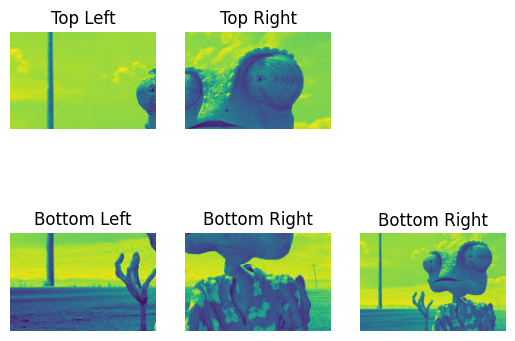

In [57]:
tl_img=img[:img.shape[0]//2,:img.shape[1]//2]
tr_img=img[:img.shape[0]//2,img.shape[1]//2:]
bl_img=img[img.shape[0]//2:,:img.shape[1]//2]
br_img=img[img.shape[0]//2:,img.shape[1]//2:]

top=np.hstack((tl_img,tr_img))
bottom=np.hstack((bl_img,br_img))
combine=np.vstack((top,bottom))



plt.subplot(2,3,1)
plt.imshow(tl_img)
plt.title("Top Left")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(tr_img)
plt.title("Top Right")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(bl_img)
plt.title("Bottom Left")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(br_img)
plt.title("Bottom Right")
plt.axis("off")

plt.subplot(2,3,6)
plt.imshow(combine)
plt.title("Bottom Right")
plt.axis("off")

plt.show()

11.Padding

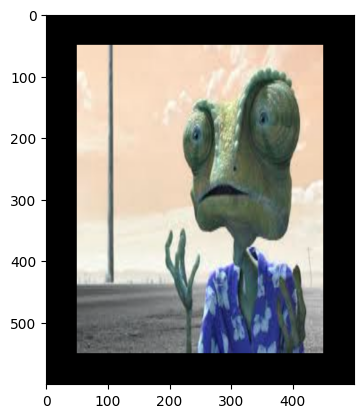

In [58]:
image = cv2.imread('image.jpeg')
new_height = 500
new_width = 400
resized_image = cv2.resize(image, (new_width, new_height))

# Specify the size of the border (top, bottom, left, right)
top_border = 50
bottom_border = 50
left_border = 50
right_border = 50

# Define the color of the border (in this case, white)
border_color = [0, 0, 0] 

# Add the border to the image
bordered_image = cv2.copyMakeBorder(resized_image, top_border, bottom_border, left_border, right_border, cv2.BORDER_CONSTANT, value=border_color)

# Display the bordered image
plt.imshow(bordered_image)

12. Image Blurning

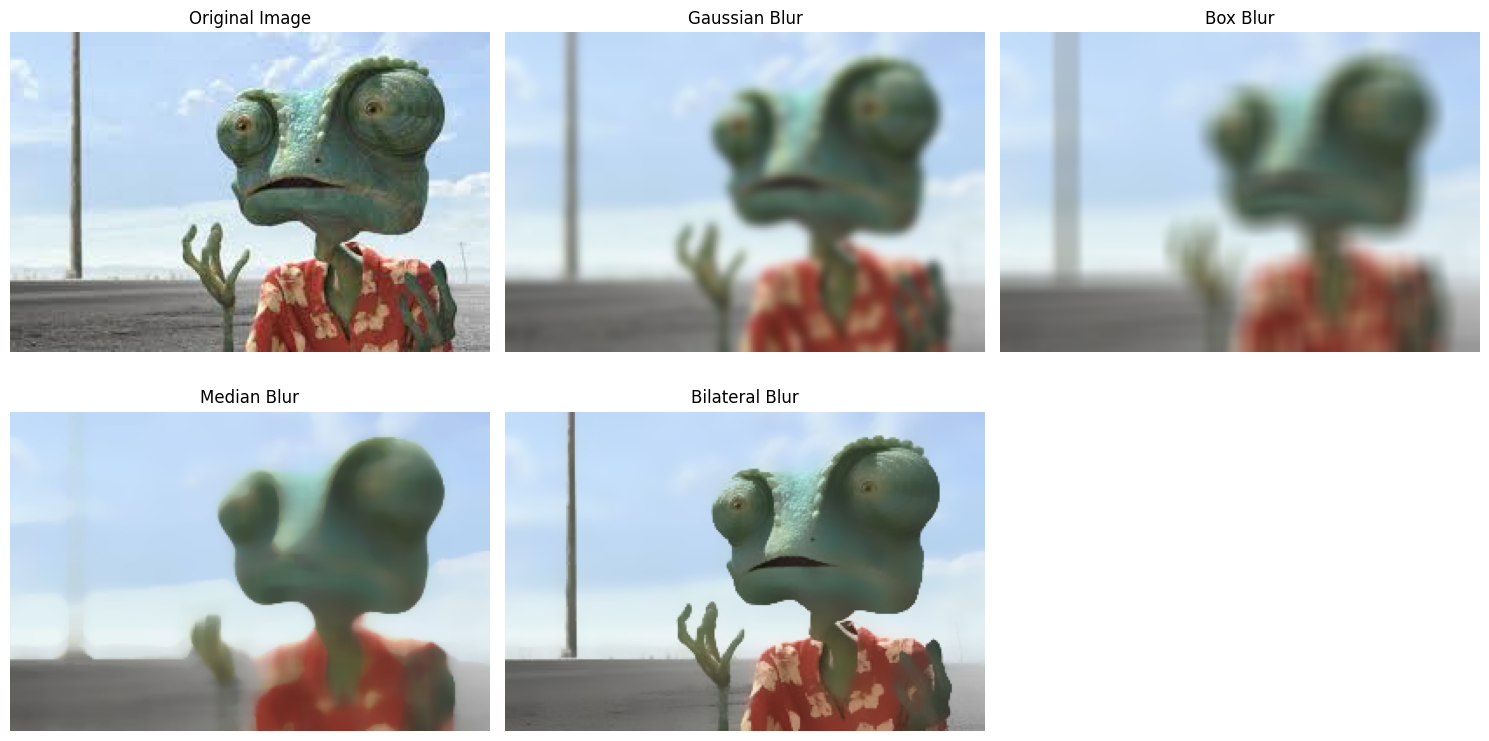

In [59]:
image = cv2.imread('image.jpeg')

# Convert to RGB (OpenCV loads images in BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply different types of blurring
# 1. Gaussian Blur
gaussian_blur = cv2.GaussianBlur(image_rgb, (15, 15), 0)

# 2. Box Blur (Averaging)
box_blur = cv2.blur(image_rgb, (15, 15))

# 3. Median Blur
median_blur = cv2.medianBlur(image_rgb, 15)

# 4. Bilateral Blur
bilateral_blur = cv2.bilateralFilter(image_rgb, 15, 75, 75)

# Display the results
titles = ['Original Image', 'Gaussian Blur', 'Box Blur', 'Median Blur', 'Bilateral Blur']
images = [image_rgb, gaussian_blur, box_blur, median_blur, bilateral_blur]

plt.figure(figsize=(15, 8))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


 13.Sharping
 

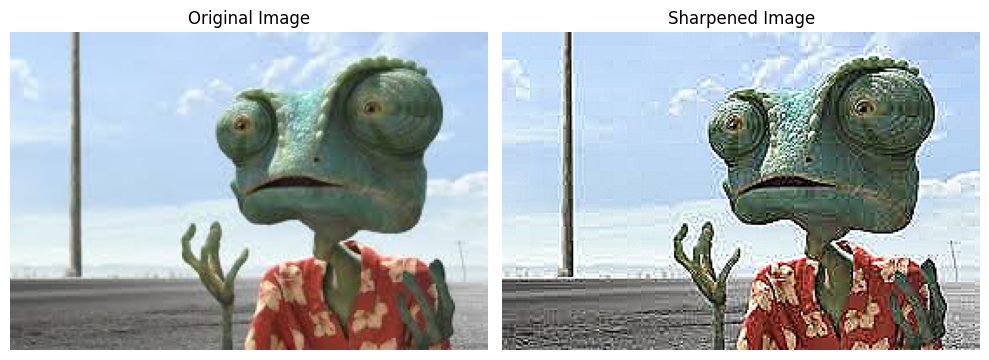

In [60]:
image = cv2.imread('image.jpeg')

# Convert to RGB (OpenCV loads images in BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define sharpening kernel
# A commonly used sharpening kernel:
sharpening_kernel = np.array([[ 0, -1,  0],
                               [-1,  5, -1],
                               [ 0, -1,  0]])

# Apply the sharpening kernel using cv2.filter2D
sharpened_image = cv2.filter2D(image_rgb, -1, sharpening_kernel)

# Display the results
titles = ['Original Image', 'Sharpened Image']
images = [image_rgb, sharpened_image]

plt.figure(figsize=(10, 5))
for i in range(len(images)):
    plt.subplot(1, 2, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


14.Edge detection

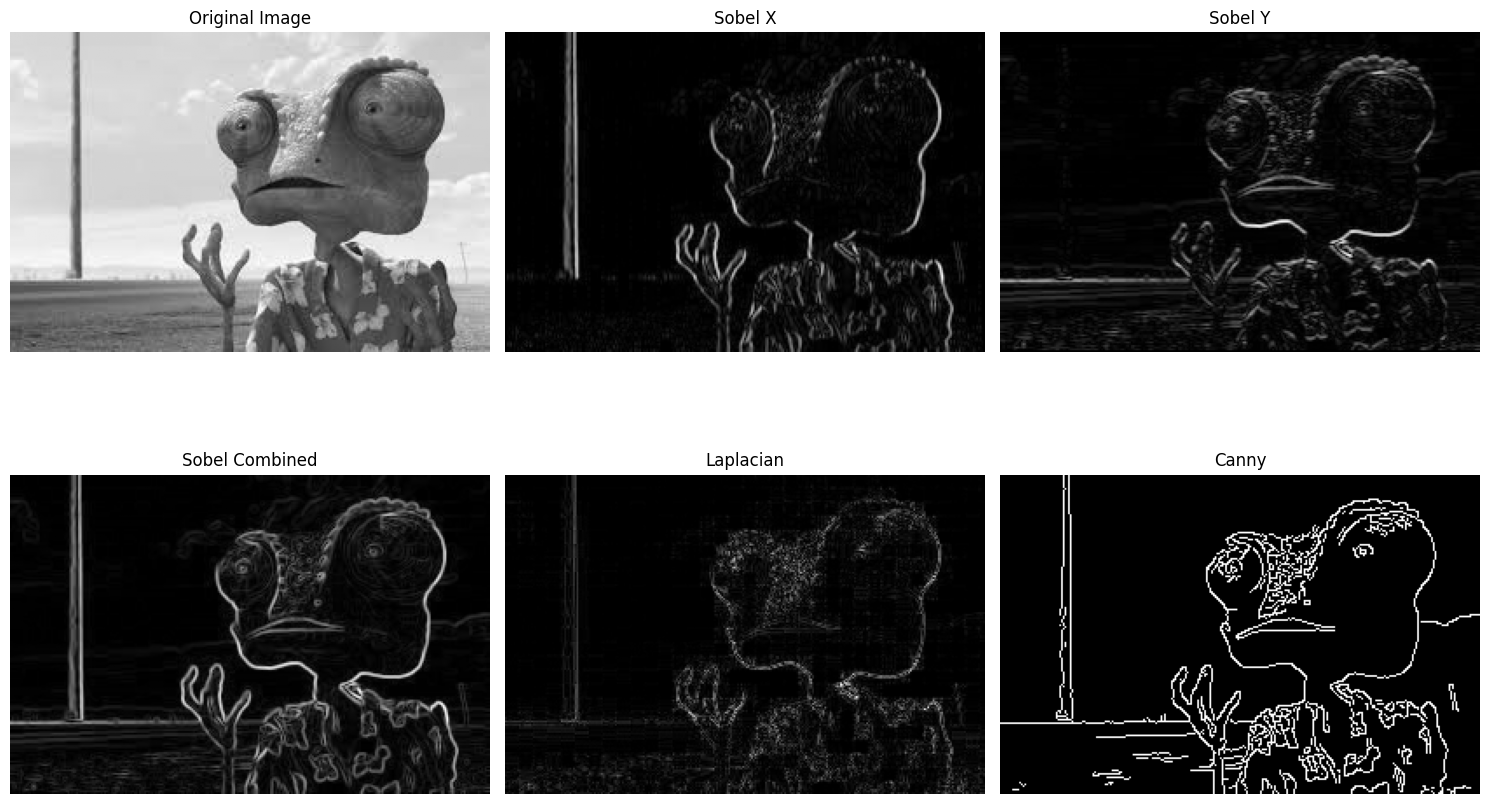

In [61]:
image = cv2.imread('image.jpeg', cv2.IMREAD_GRAYSCALE)  # Convert to grayscale for edge detection

# Apply different edge detection techniques

# 1. Sobel Edge Detection (X and Y gradients)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in X direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# 2. Laplacian Edge Detection
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# 3. Canny Edge Detection
canny_edges = cv2.Canny(image, 100, 200)  # Adjust thresholds as needed

# Display the results
titles = ['Original Image', 'Sobel X', 'Sobel Y', 'Sobel Combined', 'Laplacian', 'Canny']
images = [image, sobel_x, sobel_y, sobel_combined, laplacian, canny_edges]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    if i == 5:  # For Canny, use binary map
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(np.abs(images[i]), cmap='gray')  # Use absolute values for gradients
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


15.Line detection

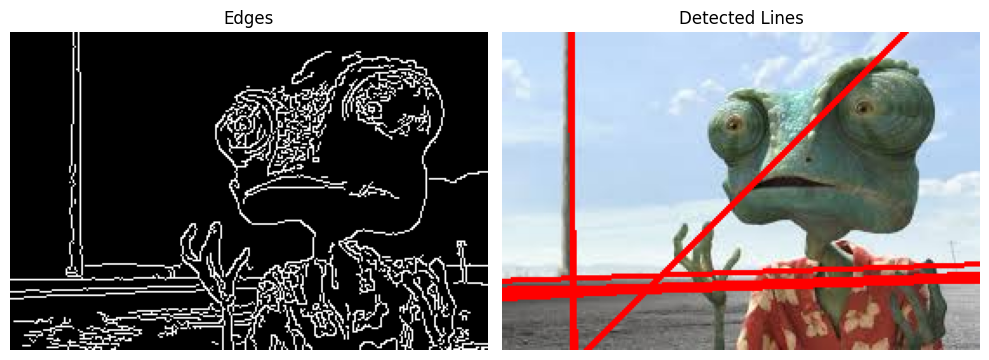

In [62]:
# Load an image
image_path = "image.jpeg"  # Replace with your image path
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Apply edge detection (Canny)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Detect lines using the Hough Line Transform
lines = cv2.HoughLines(edges, rho=1, theta=np.pi / 180, threshold=100)

# Draw the detected lines on the original image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the original image with lines
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.title("Edges")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Lines")
plt.axis("off")

plt.tight_layout()
plt.show()


16.ponit detection

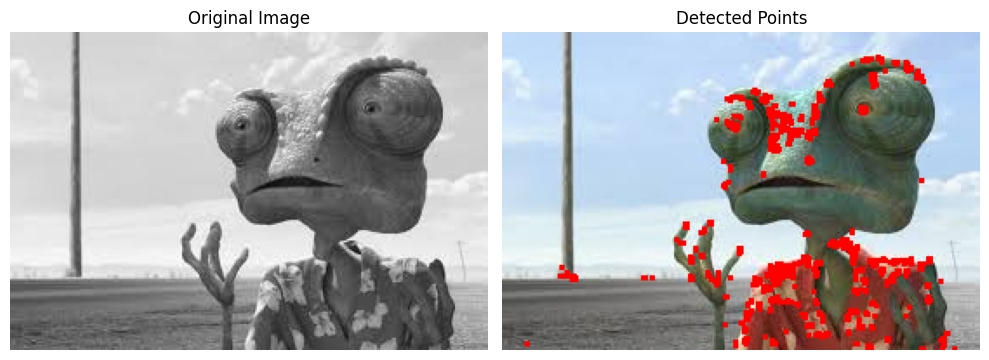

In [63]:
# Load an image
image_path = "image.jpeg"  # Replace with your image path
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Harris Corner Detection
gray_float = np.float32(gray)  # Convert to float32 as required by Harris
corners = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)

# Dilate corner points to enhance them
corners = cv2.dilate(corners, None)

# Threshold to detect strong corners
threshold = 0.01 * corners.max()
image[corners > threshold] = [0, 0, 255]  # Mark detected points in red

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB), cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Points")
plt.axis("off")

plt.tight_layout()
plt.show()


17.Histogram equalization

18.Erosion

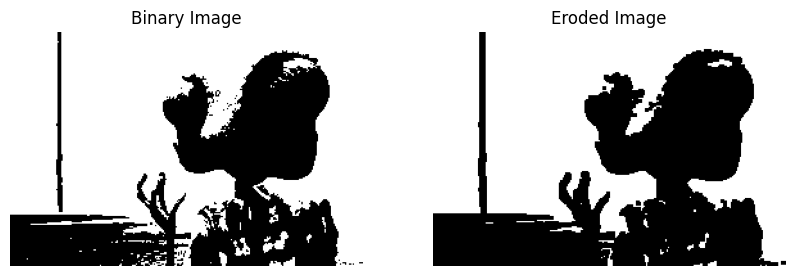

In [64]:

kernel = np.ones((3, 3), np.uint8)

# Step 5: Apply the erosion operation
eroded_img = cv2.erode(binary_img, kernel, iterations=1)

# Step 6: Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_img, cmap='gray')  # Binary Image
plt.title("Binary Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded_img, cmap='gray')  # Eroded Image
plt.title("Eroded Image")
plt.axis('off')

plt.show()

19.Dilation

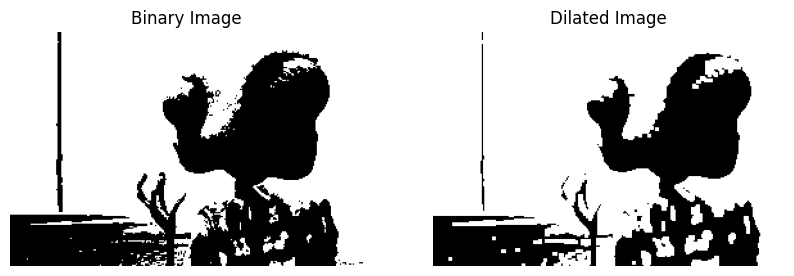

In [65]:
dilated_img = cv2.dilate(binary_img, kernel, iterations=1)

# Step 6: Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_img, cmap='gray')  # Binary Image
plt.title("Binary Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_img, cmap='gray')  # Dilated Image
plt.title("Dilated Image")
plt.axis('off')

plt.show()

20. Opening


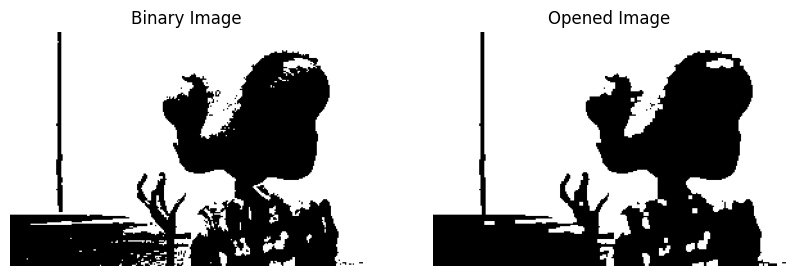

In [66]:
opened_img = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)

# Step 6: Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_img, cmap='gray')  # Binary Image
plt.title("Binary Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(opened_img, cmap='gray')  # Opened Image
plt.title("Opened Image")
plt.axis('off')

plt.show()

21. Closing


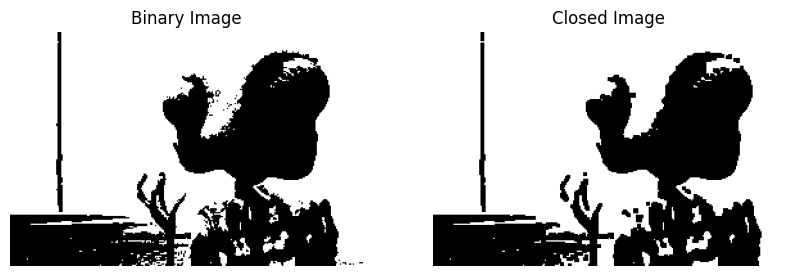

In [67]:
closed_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)

# Step 6: Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_img, cmap='gray')  # Binary Image
plt.title("Binary Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(closed_img, cmap='gray')  # Closed Image
plt.title("Closed Image")
plt.axis('off')

plt.show()